In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy.io import ascii
import scipy.constants as const
import random
import corner

%matplotlib inline

h = const.h
c = const.c
k = const.k
e = math.e

#check constants, just to be sure
#print(h, c, k, e)

In [83]:
#Column #1 = Wavelength [microns]
#Column #2 = Log10( Flux [erg s^-1 cm^-1 Angstroms^-1] )
#Column #3 = Error on Column 2

wavelength, logflux, logfluxerror = np.loadtxt('data/SED.dat', usecols=(0,1,2), delimiter='\t', skiprows=5, unpack=True)

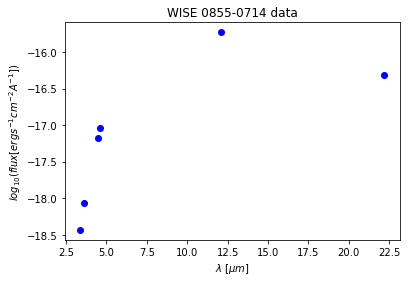

In [84]:
plt.plot(wavelength, logflux, 'bo')
plt.title('WISE 0855-0714 data')
plt.ylabel('$log_{10}(flux [erg s^{-1} cm^{-2} A^{-1}] )$')
plt.xlabel('$\lambda$ [$\mu m$]')
plt.show()

### In terms of wavelength,

# $B_{\lambda}(T)  = \frac{2hc^{2}/\lambda^{5}}{e^{hc/\lambda kT}-1}$



In [85]:
def logplanck(wavelength, temp, logfactor):
    B = ((2*h*c**2) / (wavelength**5)) / (np.exp((h*c) / (wavelength*k*temp)) - 1)
    intensity = np.log10(B) - logfactor
    return intensity

In [86]:
#shape parameters for priors
sigma = np.std(logflux)
mu = np.mean(logflux)
guess_theta = [300, 22.7]

model_wavelength = np.arange(0.1e-6, 40e-6, .05e-6)
model_Teff = 300

model = logplanck(model_wavelength, guess_theta[0], guess_theta[1])
print(model[0:10])

[-211.90842773 -143.36076564 -109.27140013  -88.92751468  -75.43779723
  -65.85422856  -58.70546132  -53.1755474   -48.77579363  -45.19576878]


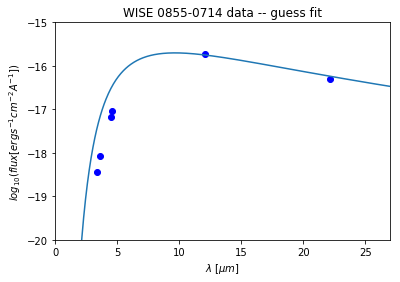

In [87]:
plt.plot(wavelength, logflux, 'bo')
plt.plot(model_wavelength*1e6, model)
plt.title('WISE 0855-0714 data -- guess fit')
plt.ylabel('$log_{10}(flux [erg s^{-1} cm^{-2} A^{-1}] )$')
plt.xlabel('$\lambda$ [$\mu m$]')
plt.xlim(0,27)
plt.ylim(-20,-15)
plt.show()

# $log \mathscr{L} = -\frac{1}{2}\Sigma(\frac{r_{i}}{\sigma_{i}})^{2}$

In [88]:
#set a definition for the loglikelihood, assuming normally distributed data
def log_likelihood(wavelength, logflux, errlogflux, theta):
    
    chi_sq = [];
    
    for i in range(len(wavelength)):
        #r = residual
        #print('log_likelihood: for loop...')
        r = logplanck(wavelength[i], theta[0], theta[1]) - logflux[i]
        #print('r = ', r)
        chi_sq.append((r / errlogflux[i])**2)
    
    loglike = -(np.sum(chi_sq)) / 2
    return loglike

In [90]:
def mcmc(wavelength, logflux, errlogflux, prior, Nsteps, step_size):
    
    #count number of accepted jumps
    count = 1
    
    #set boundaries
    t_min = prior[0][0]; t_max = prior[0][1];
    logfactor_min = prior[1][0]; logfactor_max = prior[1][1];
    
    #random initialization
    theta = [[random.randint(t_min, t_max), random.randint(logfactor_min, logfactor_max)]]
    
    #compute loglikelihood
    #log_likelihood(wavelength, logflux, errlogflux, theta):
    likelihood = []
    likelihood.append(log_likelihood(wavelength, logflux, errlogflux, theta[-1]))
    #print('mcmc: likelihood: ')
    
    for i in range(Nsteps):
        
        #generate a jump proposal
        proposed_jump = [np.random.normal(theta[-1][0], step_size), np.random.normal(theta[-1][1], step_size)]
        
        #store chi squared from proposal
        temp_likelihood = log_likelihood(wavelength, logflux, errlogflux, proposed_jump)
        
        #jump if parameters are inbounds and if proposed chi squared is less than current chi squared
        if ((t_min <= proposed_jump[0] <= t_max) and (logfactor_min <= proposed_jump[1] <= logfactor_max) and (temp_likelihood < likelihood[-1])):
            #proposed theta becomes current theta
            theta.append(proposed_jump)
            
            #proposed likelihood becomes currentlikelihood
            likelihood.append(temp_likelihood)
            count += 1
        else:
            next
    return theta, likelihood, count
            

In [109]:
#mcmc(wavelength, logflux, errlogflux, prior, Nsteps, step_size)

theta_array, likelihood_array, count = mcmc(wavelength, logflux, logfluxerror, [[200, 350], [-50, 0]], 10000, .5)

74 74
[-589678.96498612617, -605048.24714810366, -620734.12675083138, -674780.63908157451, -700751.89226266323, -716581.56457432231, -719358.90774990921, -766578.97457012872, -766833.01790008915, -776893.75014658726, -806956.07077163691, -817934.60778305237, -856689.44565102179, -867481.66796314484, -884859.0333434944, -932045.64149269671, -933096.35921496851, -940228.86642693682, -973316.42510709516, -1018798.2330633843, -1076488.8775043627, -1089077.5679598909, -1105520.5885862387, -1149742.3983166211, -1162041.2220352625, -1216008.151890198, -1230935.4181378167, -1245563.2113303731, -1266532.1075079902, -1274771.9684805241, -1293379.8726497008, -1317422.6496508955, -1324117.4027204474, -1339540.3513524225, -1356010.2949458063, -1369084.2748251115, -1387649.1598584405, -1390946.1722680773, -1415355.8619603221, -1427389.9561788233, -1471095.4911383574, -1528012.3426281018, -1549381.9710190843, -1556754.8464346859, -1557650.7326102643, -1583604.7768417699, -1707966.7592501382, -1741211

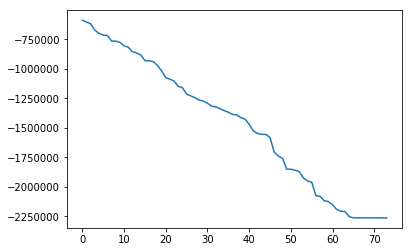

In [114]:
print(count, len(likelihood_array))

print(likelihood_array)

plt.plot(range(count), likelihood_array)

In [ ]:
plt.plot(theta_array()

In [128]:
theta_array[][0]

[342, -24]

In [35]:
foo.append(bar)

In [36]:
foo

[[1, 2], [3, 4]]

In [15]:
print(foo)
print(foo[-1])
print(foo[-1][0])

[[1, 2], [3, 4]]
[3, 4]
3
